# Machine Learning: Simple Linear Regression
## 1. Introduction
### 1.1 Definition

In statistics, linear regression is a linear approach to modeling the relationship between a dependent variable $y$ and one or more explanatory variables (or independent variables) $x_1, x_2, x_3 ...$). When there is a single independent variable, the method is referred to as __simple linear regression__. When there are multiple independent variables, literature from statistics often refers to the method as __multiple linear regression__. In machine learning, this is part of supervised learning and the independent variables are called _features_ and the dependent variable is called _target_.

Different techniques can be used to prepare or train the linear regression equation from data, the most common of which is called __Ordinary Least Squares__ (OLS).

### 1.2 Linear Model or Equation
The formula below is a linear equation that approximates the function of $x$ which best describes $y$. As such, both the $x$ and $y$ are continuous and numeric.

$y = f(x) = \beta_0 + \beta_1 x_1 + \epsilon$

The linear equation assigns one __coefficient__ to each dependent variable $x_1$, represented by the Greek letter beta $\beta_1$, they describe the splope of the function. One additional coefficient is also added, giving the line an additional degree of freedom (e.g. moving up and down on a two-dimensional plot) and is often called the __intercept__ or $\beta_0$. $\epsilon$ in the model is called __error term__ or sometimes noise. This captures all other factors which influence the dependent variable other than $x$.

### 1.3 Assumptions of Linear Regression
- __Weak Exogeneity.__ This essentially means that the $x$ variables can be treated as fixed values, rather than random variables. The predictor variables are assumed to be error-free, i.e. not contaminated with measurement errors.
- __Linearity.__ This means that the variation of the $y$ variable is a linear combination of the parameters (regression coefficients) and the $x$ variables. 
- __Constant variance__ (a.k.a. _homoscedasticity_). This means that different values of the $y$ variable have the same variance in their errors, regardless of the values of the predictor variables. In practice this assumption is invalid (i.e. the errors are _heteroscedastic_) if the response variable can vary over a wide scale.
- __Independence of errors.__ This assumes that the errors are uncorrelated to the response variable and that the errors are random (i.e. not desribing another function).
- __Lack of multicollinearity__ among $x$ variables. This means a high correlation between $x$ variables will bias the coefficients of the model. Cannot happen in the case of Simple Linear Regression.

### 1.4 Interpreting Results
The coefficients produced by linear regression analysis can used to decribe to describe the relationship $x$ and $y$. $\beta_1$ is the expected change in $y$ for a one-unit change in $x$. When $x$ equals zero units, then $y$ takes is at least expected to be $\beta_0$. An unknown case (where $x$ is given and $y$ unknown) can now be plugged into the equation and be solved for the expected value $\hat{y}$. This is linear regression is used prediction.

An easy example would be the meter of a cab fare. We assume a positive linear relation between the fare ($y$) and the distance travelled ($x$). Upon entering the cab, the meter is already set to a fixed starting price at zero kilometers travelled e.g. 4€, which would be $\beta_0$. For each additional mile travelled, the meter goes up by e.g. 1.50€, which would be $\beta_1$.

### 1.5 Evaluation
The are several evaluation metrics for linear regression.
- The __coefficient of determination__, also known as goodness-of-fit, is denoted $R^2$ or $r^2$ and pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable or explained from the independent variable(s). The R-squared usually ranges between 0-1 and in case of a Simple Linear Regression, can be read as a percentage.
   - $R^2 = \frac{\frac{1}{n}\sum_{i=1}^n(y_i - \hat{y}_i)^2}{\frac{1}{n}\sum_{i=1}^n(\bar{y}_i - \hat{y}_i)^2}$
- The __Mean Absolute Error__ (MAE) is the easiest metric to understand, since it is the "average error".
   - $MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$
- The __Mean Squared Error__ (MSE) is similar to MAE but geared towards highlighting large errors. The squaring exponentially increases large errors in comparison to small ones.
   - $MSE = \frac{1}{n}\sum_{i=1}^n(y_i - \hat{y}_i)^2$
- The __Root Mean Squared Error__ (RMSE) is the most popular error metric because it is interpretable in the same units as the dependent variable $y$.
   -  $RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n(y_i - \hat{y}_i)^2}$

## 2. Simple Linear Regression on Random Data
### 2.1 Generating a Random Dataset
In order to showcase simple linear regression, a random dataset will be generated with Scikit-Learn. This regression dataset will require the following inputs:
- n_samples: the number of samples or observations in the feature set and target
   - value wil be 500
- n_features: the number of features or x-variables
   - since this is a SLR, value will be 1
- noise: the amount of noise without which the data will be perfectly linear
   - value will be 10
- random_state: this will set a seed for the random generation of data, which can be used to reproduce the same results elsewhere
   - value will be 1
   
The outputs of this random data generation will be:
- X: array of shape [n_samples, n_features] a.k.a. Feature Matrix or Independent Variable
- y: array of shape [n_samples] a.k.a. Target or Dependent Variable

In [1]:
# generate random regression dataset
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=500, n_features=1, noise=10, random_state=1)
print(X.shape, y.shape)

(500, 1) (500,)


### 2.2 Visualizing the Random Dataset
Visualizing the random dataset on a two-dimensional plot should already hint at the positive linear relationship. This means when $x$ goes up $y$ also goes up, the exact amount will be determined by the regression. 

In [2]:
# visualize the random regression dataset
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

Text(0.5, 1.0, 'Random Data for Simple Linear Regression')

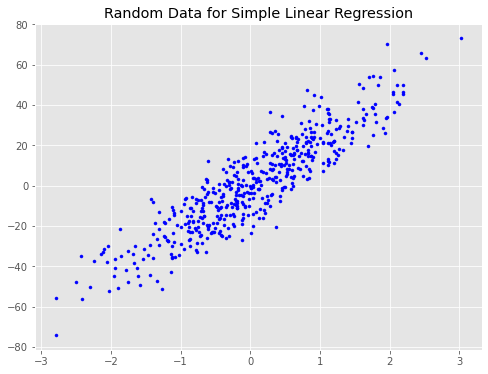

In [3]:
plt.figure(figsize=(8,6))
plt.scatter(X,y, marker='.', color='b')
plt.title('Random Data for Simple Linear Regression')

### 2.3 Modelling and Evaluating a Simple Linear Regression
In simple OLS regression, a line is fitted on the data that describes the relationship between $x_i$ and $y_i$ by minimizing the squared distances between the individual datapoints and the line itself. The distances between the actual $y_i$ and $\hat{y}_i$ is the error of the model. The error can be calculated in various metrics to determine the accuracy of the model.

In [4]:
# build a simple linear regression model
from sklearn.linear_model import LinearRegression

SLR = LinearRegression()
SLR.fit(X,y)
b_0 = SLR.intercept_
b_1 = SLR.coef_

# obtain coefficients
print ('Intercept %.4f' % b_0)
print ('Coefficient %.4f' % b_1)

Intercept 0.0880
Coefficient 21.5485


Text(0.5, 1.0, 'Simple Linear Regression Model')

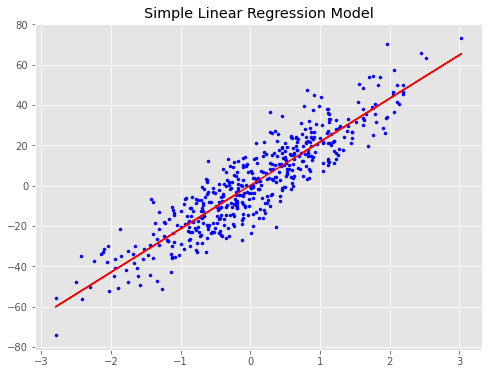

In [5]:
# visualize SLR model on dataset
plt.figure(figsize=(8,6))
plt.scatter(X, y, marker='.', color='b')
plt.plot(X, b_1 * X + b_0, '-r') # plot the line in form of its linear equation
plt.title('Simple Linear Regression Model')

In [6]:
#evaluation
import numpy as np
# obtain predictions
y_hat = SLR.predict(X)

print("R-squared: %.4f" %SLR.score(X,y))
print("Mean Absolute Error (MAE): %.4f" % np.mean(np.absolute(y - y_hat)))
print("Mean Squared Error (MSE): %.4f" % np.mean((y- y_hat) ** 2))
print("Root Mean Squared Error (RMSE): %.4f" % np.sqrt(np.mean((y - y_hat) ** 2)))

R-squared: 0.8222
Mean Absolute Error (MAE): 7.9577
Mean Squared Error (MSE): 98.0931
Root Mean Squared Error (RMSE): 9.9042


### 2.4 SLR with a Negative Linear Relationship
Simple linear regression can determine both positive and negative linear relationships. A negative linear relation, i.e. when $x$ increases $y$ decreases, is showcased below on another randomly generated dataset.

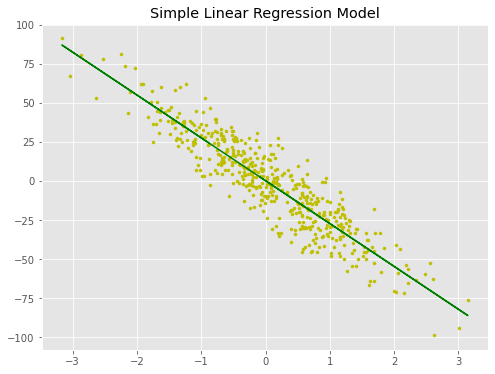

Intercept 0.1387
Coefficient -27.3854
R-squared: 0.8396
Mean Absolute Error (MAE): 9.6632
Mean Squared Error (MSE): 144.9082
Root Mean Squared Error (RMSE): 12.0378


In [7]:
# SLR with negative linear relation
X, y = make_regression(n_samples=500, n_features=1, noise=12, random_state=12)
X = X*-1
neg_SLR = LinearRegression()
neg_SLR.fit(X,y)
y_hat = neg_SLR.predict(X)
b_1 = neg_SLR.coef_
b_0 = neg_SLR.intercept_
plt.figure(figsize=(8,6))
plt.scatter(X, y, marker='.', color='y')
plt.plot(X, b_1 * X + b_0, '-g')
plt.title('Simple Linear Regression Model')
plt.show()
print ('Intercept %.4f' % b_0)
print ('Coefficient %.4f' % b_1)
print("R-squared: %.4f" %neg_SLR.score(X,y))
print("Mean Absolute Error (MAE): %.4f" % np.mean(np.absolute(y - y_hat)))
print("Mean Squared Error (MSE): %.4f" % np.mean((y- y_hat) ** 2))
print("Root Mean Squared Error (RMSE): %.4f" % np.sqrt(np.mean((y - y_hat) ** 2)))

## 3. Simple Linear Regression on Real-World Data
### 3.1 The Goal and the Dataset

As most researched and most applied tool of statistics and econometrics, regression analysis has been used in countless applications and case studies. As it predicts a continuous, numerical value for objects with one or more features, its most common business application is price prediction. However, this notebook will employ SLR analysis to find which single feature best predicts the carbon emissions for cars. More precisely, the dataset called "FuelConsumption.csv" collected by the Canadian government provides data on model-specific fuel consumption ratings and estimated CO2 emissions for new light-duty vehicles for retail in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

| Feature Name | Meaning |
|--------------|---------|
| MODELYEAR | year in which vehicle was released onto Canadian market |
| MAKE | company producing the vehicle |
| MODEL | model of the vehicle |
| VEHICLECLASS | type of vehicle |
| ENGINESIZE | engine size in L |
| CYLINDERDS | number of cylinders |
| TRANSMISSION | type of transmission and number of gears |
| FUELCONSUMPTION_CITY | fuel consumption in city in L/100km |
| FUELCONSUMPTION_HWY | fuel consumption on highway in L/100km |
| FUELCONSUMPTION_COMB | fuel consumption city & highway combined average in L/100km |
| FUELCONSUMPTION_COMB_MPG | fuel consumption city & highway combined average in MPG |
| CO2EMISSIONS | CO2 emissions in g/km |

In [8]:
# download the dataset from IBM cloud storage
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
print("Download complete.")

Download complete.


In [9]:
# read dataset into pandas dataframe
import pandas as pd
df = pd.read_csv("FuelConsumption.csv")
print(df.shape)
df.head()

(1067, 13)


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### 3.2 Exploratory Data Analysis
Exploratory data analysis (EDA) are the processes of gaining preliminary insights on a dataset before data mining. Summary statistics and visualization are common tools of ESA to observe the distributions and other characteristics of features in a dataset.

In [10]:
# obtain descriptive/summary statistics
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


<AxesSubplot:>

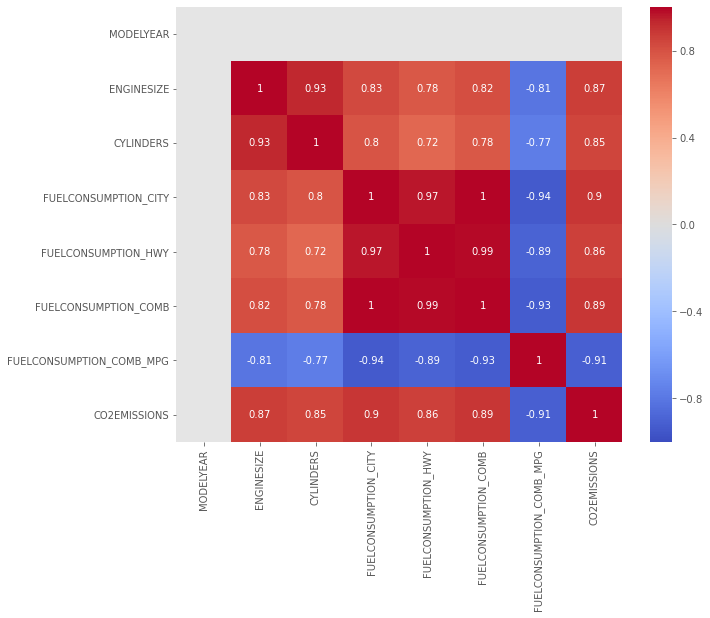

In [11]:
# obtain a correlation heatmap
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, cmap= 'coolwarm')

All continuous features have a high correlation with the target. For now, this notebook will focus on engine size, cylinders, and combined fuel consumption as potential predictors for CO2 emission. (In mulitple linear regression, these three features could be used together, but since this notebook is about SLR, their relationship to the target will be explored individually.) 

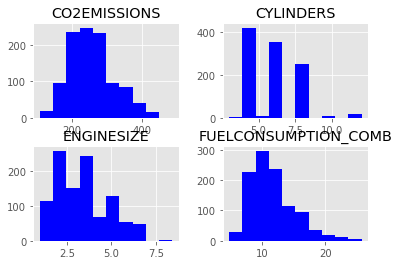

In [12]:
# visualize the distribution of the features & target
viz = df[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist(color='b')
plt.show()

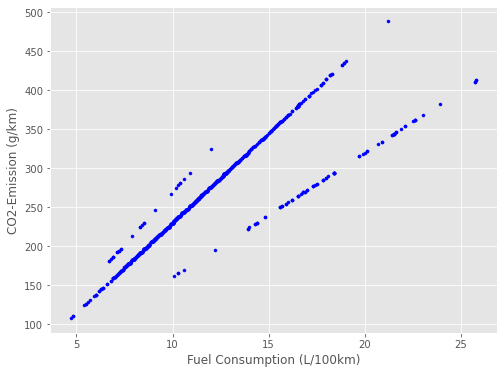

In [13]:
# combined fuel consumption vs CO2
plt.figure(figsize=(8,6))
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS, marker='.', color='b')
plt.xlabel("Fuel Consumption (L/100km)")
plt.ylabel("CO2-Emission (g/km)")
plt.show()

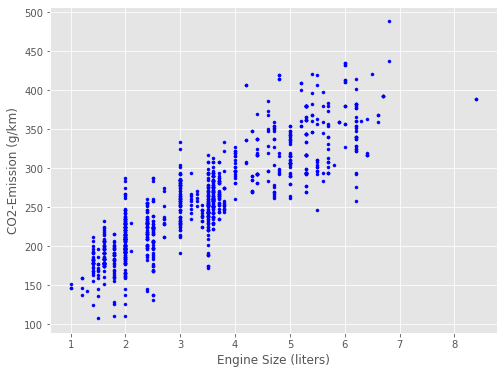

In [14]:
# engine size vs CO2
plt.figure(figsize=(8,6))
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS, marker='.', color='b')
plt.xlabel("Engine Size (liters)")
plt.ylabel("CO2-Emission (g/km)")
plt.show()

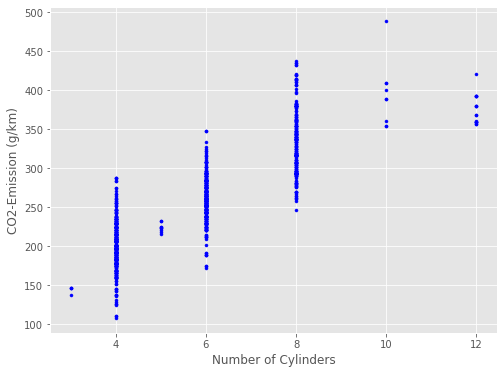

In [15]:
# cylinders vs CO2
plt.figure(figsize=(8,6))
plt.scatter(df.CYLINDERS, df.CO2EMISSIONS, marker='.', color='b')
plt.xlabel("Number of Cylinders")
plt.ylabel("CO2-Emission (g/km)")
plt.show()

### 3.3 Modelling and Evaluating SLR
Engine size vs CO2 resemble most closely conditions of the first random dataset, i.e. it does not violate any assumptions of OLS regression. However, SLR models will be build for all 3 features. Some form of positive linear relation is visible for all 3 features with the target.

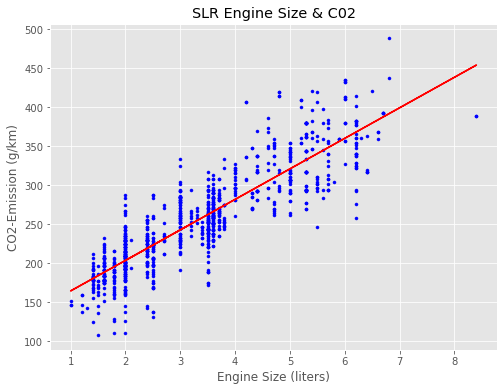

Intercept 125.3041
Coefficient 39.1252
This means for each additional liter in engine size, the CO2 emission is expected to increase by 39 g/km.
R-squared: 0.7641
Mean Absolute Error (MAE): 23.3469
Mean Squared Error (MSE): 946.3141
Root Mean Squared Error (RMSE): 30.7622


In [16]:
# modelling for X=engine size and y=C02
SLR = LinearRegression()
X = np.asanyarray(df[['ENGINESIZE']])
y = np.asanyarray(df[['CO2EMISSIONS']])
SLR.fit(X, y)
y_hat = SLR.predict(X)
b_1 = SLR.coef_
b_0 = SLR.intercept_
plt.figure(figsize=(8,6))
plt.scatter(X, y, marker='.', color='b')
plt.plot(X, b_1 * X + b_0, '-r')
plt.title('SLR Engine Size & C02')
plt.xlabel("Engine Size (liters)")
plt.ylabel("CO2-Emission (g/km)")
plt.show()
print ('Intercept %.4f' % b_0)
print ('Coefficient %.4f' % b_1)
print ('This means for each additional liter in engine size, the CO2 emission is expected to increase by %.0f' %b_1, 'g/km.')
print("R-squared: %.4f" %SLR.score(X,y))
print("Mean Absolute Error (MAE): %.4f" % np.mean(np.absolute(y - y_hat)))
print("Mean Squared Error (MSE): %.4f" % np.mean((y- y_hat) ** 2))
print("Root Mean Squared Error (RMSE): %.4f" % np.sqrt(np.mean((y - y_hat) ** 2)))

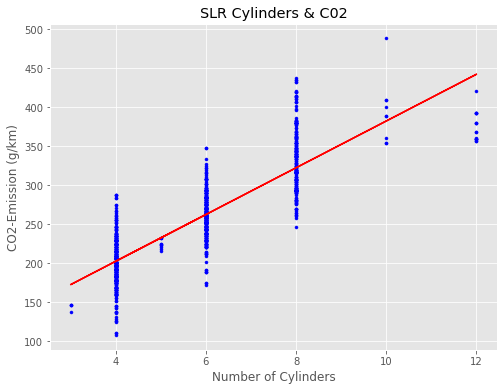

Intercept 82.6342
Coefficient 29.9572
This means for each additional cylinder in the engine, the CO2 emission is expected to increase by 30 g/km.
R-squared: 0.7220
Mean Absolute Error (MAE): 25.7158
Mean Squared Error (MSE): 1115.5601
Root Mean Squared Error (RMSE): 33.4000


In [17]:
# modelling for x=cylinders consumption and y=C02
SLR = LinearRegression()
X = np.asanyarray(df[['CYLINDERS']])
y = np.asanyarray(df[['CO2EMISSIONS']])
SLR.fit(X, y)
y_hat = SLR.predict(X)
b_1 = SLR.coef_
b_0 = SLR.intercept_
plt.figure(figsize=(8,6))
plt.scatter(X, y, marker='.', color='b')
plt.plot(X, b_1 * X + b_0, '-r')
plt.title('SLR Cylinders & C02')
plt.xlabel("Number of Cylinders")
plt.ylabel("CO2-Emission (g/km)")
plt.show()
print ('Intercept %.4f' % b_0)
print ('Coefficient %.4f' % b_1)
print ('This means for each additional cylinder in the engine, the CO2 emission is expected to increase by %.0f' %b_1, 'g/km.')
print("R-squared: %.4f" %SLR.score(X,y))
print("Mean Absolute Error (MAE): %.4f" % np.mean(np.absolute(y - y_hat)))
print("Mean Squared Error (MSE): %.4f" % np.mean((y- y_hat) ** 2))
print("Root Mean Squared Error (RMSE): %.4f" % np.sqrt(np.mean((y - y_hat) ** 2)))

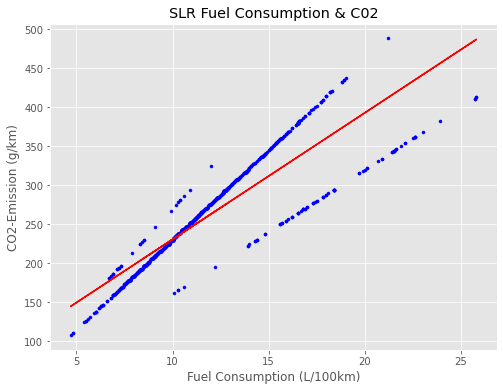

Intercept 68.3871
Coefficient 16.2200
This means for each additional liter of fuel consumed per 100km, the CO2 emission is expected to increase by 16 g/km.
R-squared: 0.7959
Mean Absolute Error (MAE): 20.3610
Mean Squared Error (MSE): 818.9338
Root Mean Squared Error (RMSE): 28.6170


In [18]:
# modelling for x=fuel consumption and y=C02
SLR = LinearRegression()
X = np.asanyarray(df[['FUELCONSUMPTION_COMB']])
y = np.asanyarray(df[['CO2EMISSIONS']])
SLR.fit(X, y)
y_hat = SLR.predict(X)
b_1 = SLR.coef_
b_0 = SLR.intercept_
plt.figure(figsize=(8,6))
plt.scatter(X, y, marker='.', color='b')
plt.plot(X, b_1 * X + b_0, '-r')
plt.title('SLR Fuel Consumption & C02')
plt.xlabel("Fuel Consumption (L/100km)")
plt.ylabel("CO2-Emission (g/km)")
plt.show()
print ('Intercept %.4f' % b_0)
print ('Coefficient %.4f' % b_1)
print ('This means for each additional liter of fuel consumed per 100km, the CO2 emission is expected to increase by %.0f' %b_1, 'g/km.')
print("R-squared: %.4f" %SLR.score(X,y))
print("Mean Absolute Error (MAE): %.4f" % np.mean(np.absolute(y - y_hat)))
print("Mean Squared Error (MSE): %.4f" % np.mean((y- y_hat) ** 2))
print("Root Mean Squared Error (RMSE): %.4f" % np.sqrt(np.mean((y - y_hat) ** 2)))

It is obvious that all features combined would provide a more accurate picture of how they influence the CO2 emission of vehicles. This will be explored in the notebook multiple linear regression.